### **i.1 START of Tabular Classification/Regression **

In [ ]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
data_url = 'https://raw.githubusercontent.com/mli/ag-docs/main/knot_theory/'
train_data = TabularDataset(f'{data_url}train.csv')
train_data.head()


,Unnamed: 0,chern_simons,cusp_volume,hyperbolic_adjoint_torsion_degree,hyperbolic_torsion_degree,injectivity_radius,longitudinal_translation,meridinal_translation_imag,meridinal_translation_real,short_geodesic_imag_part,short_geodesic_real_part,Symmetry_0,Symmetry_D3,Symmetry_D4,Symmetry_D6,Symmetry_D8,Symmetry_Z/2 + Z/2,volume,signature
0,70746,0.090530,12.226322,0,10,0.507756,10.685555,1.144192,-0.519157,-2.760601,1.015512,0.0,0.0,0.0,0.0,0.0,1.0,11.393225,-2
1,240827,0.232453,13.800773,0,14,0.413645,10.453156,1.320249,-0.158522,-3.013258,0.827289,0.0,0.0,0.0,0.0,0.0,1.0,12.742782,0
2,155659,-0.144099,14.761030,0,14,0.436928,13.405199,1.101142,0.768894,2.233106,0.873856,0.0,0.0,0.0,0.0,0.0,0.0,15.236505,2
3,239963,-0.171668,13.738019,0,22,0.249481,27.819496,0.493827,-1.188718,-2.042771,0.498961,0.0,0.0,0.0,0.0,0.0,0.0,17.279890,-8
4,90504,0.235188,15.896359,0,10,0.389329,15.330971,1.036879,0.722828,-3.056138,0.778658,0.0,0.0,0.0,0.0,0.0,0.0,16.749298,4


In [ ]:
label = 'signature'
train_data[label].describe()

,signature
count,10000.000000
mean,-0.022000
std,3.025166
min,-12.000000
25%,-2.000000
50%,0.000000
75%,2.000000
max,12.000000


In [ ]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240916_010143"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.35 GB / 12.67 GB (89.5%)
Disk Space Avail:   65.39 GB / 107.72 GB (60.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

In [ ]:
test_data = TabularDataset(f'{data_url}test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()


Loaded data from: https://raw.githubusercontent.com/mli/ag-docs/main/knot_theory/test.csv | Columns = 19 / 19 | Rows = 5000 -> 5000


,signature
0,-4
1,-2
2,0
3,4
4,2


In [ ]:
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.9502,
 'balanced_accuracy': 0.763256437334731,
 'mcc': 0.93898184794477}

In [ ]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.9502,0.964965,accuracy,2.575269,0.690982,43.706128,0.011109,0.001293,0.284508,2,True,14
1,LightGBM,0.9456,0.955956,accuracy,0.895054,0.187067,8.414087,0.895054,0.187067,8.414087,1,True,5
2,XGBoost,0.9448,0.956957,accuracy,2.009300,0.478604,15.192919,2.009300,0.478604,15.192919,1,True,11
3,LightGBMLarge,0.9444,0.949950,accuracy,2.518353,0.486717,16.773606,2.518353,0.486717,16.773606,1,True,13
4,CatBoost,0.9432,0.955956,accuracy,0.062840,0.012881,72.780716,0.062840,0.012881,72.780716,1,True,8
5,RandomForestEntr,0.9384,0.949950,accuracy,0.340872,0.149910,10.008543,0.340872,0.149910,10.008543,1,True,7
6,NeuralNetFastAI,0.9364,0.940941,accuracy,0.154411,0.043722,18.180100,0.154411,0.043722,18.180100,1,True,3
7,ExtraTreesGini,0.9360,0.946947,accuracy,0.587496,0.241373,4.147322,0.587496,0.241373,4.147322,1,True,9
8,ExtraTreesEntr,0.9358,0.942943,accuracy,0.691186,0.170345,2.720552,0.691186,0.170345,2.720552,1,True,10
9,RandomForestGini,0.9352,0.944945,accuracy,0.370074,0.174808,7.037652,0.370074,0.174808,7.037652,1,True,6


***END of Tabular Classification/Regression***

**i.2 START Multimodal Tabular**

In [ ]:
download_dir = './ag_petfinder_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_kaggle.zip'

In [ ]:
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 2.00G/2.00G [01:02<00:00, 31.7MiB/s]
Unzipping ./ag_petfinder_tutorial/file.zip to ./ag_petfinder_tutorial


In [ ]:
import os
os.listdir(download_dir)

['petfinder_processed', 'file.zip']

In [ ]:
dataset_path = download_dir + '/petfinder_processed'
os.listdir(dataset_path)

['test.csv', 'train.csv', 'test_images', 'train_images', 'dev.csv']

In [ ]:
os.listdir(dataset_path + '/train_images')[:10]

['53964c5d0-11.jpg',
 'a7f77b3bd-8.jpg',
 '0a9f9f178-1.jpg',
 '0afb7e845-6.jpg',
 '49a867af7-3.jpg',
 'b4d16b6f6-1.jpg',
 '50d2b5839-7.jpg',
 'e6ff63097-2.jpg',
 '1b36762d2-7.jpg',
 'dd38f7a48-4.jpg']

In [ ]:
import pandas as pd

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/dev.csv', index_col=0)

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,train_images/e4b90955c-1.jpg;train_images/e4b90955c-2.jpg;train_images/e4b90955c-3.jpg;train_images/e4b90955c-4.jpg
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alor and was foster by a feeder. All his siblings had died of accident. His mother and grandmother had just been spayed. Darling make a great condo/apartment cat. He love to play a lot. He would make a great companion for someone looking for a cat to love.,a0c1384d1,5.0,3,train_images/a0c1384d1-1.jpg;train_images/a0c1384d1-2.jpg;train_images/a0c1384d1-3.jpg;train_images/a0c1384d1-4.jpg;train_images/a0c1384d1-5.jpg
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drain. He was very skinny and had no energy. I have nursed him back to health. He has been to Veterinary clinic and been treated for a skin issue. Very friendly and playful puppy.,cf357f057,7.0,4,train_images/cf357f057-1.jpg;train_images/cf357f057-2.jpg;train_images/cf357f057-3.jpg;train_images/cf357f057-4.jpg;train_images/cf357f057-5.jpg;train_images/cf357f057-6.jpg;train_images/cf357f057-7.jpg


In [ ]:
label = 'AdoptionSpeed'
image_col = 'Images'

In [ ]:
train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg;train_images/e4b90955c-2.jpg;train_images/e4b90955c-3.jpg;train_images/e4b90955c-4.jpg'

In [ ]:
train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg'

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

train_data[image_col].iloc[0]

'/content/ag_petfinder_tutorial/petfinder_processed/train_images/e4b90955c-1.jpg'

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,/content/ag_petfinder_tutorial/petfinder_processed/train_images/e4b90955c-1.jpg
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alor and was foster by a feeder. All his siblings had died of accident. His mother and grandmother had just been spayed. Darling make a great condo/apartment cat. He love to play a lot. He would make a great companion for someone looking for a cat to love.,a0c1384d1,5.0,3,/content/ag_petfinder_tutorial/petfinder_processed/train_images/a0c1384d1-1.jpg
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drain. He was very skinny and had no energy. I have nursed him back to health. He has been to Veterinary clinic and been treated for a skin issue. Very friendly and playful puppy.,cf357f057,7.0,4,/content/ag_petfinder_tutorial/petfinder_processed/train_images/cf357f057-1.jpg


In [ ]:
example_row = train_data.iloc[1]

example_row

,13114
Type,2
Name,Darling
Age,4
Breed1,266
Breed2,0
Gender,1
Color1,1
Color2,0
Color3,0
MaturitySize,2


In [ ]:
example_row['Description']

'Darling was born at the back lane of Jalan Alor and was foster by a feeder. All his siblings had died of accident. His mother and grandmother had just been spayed. Darling make a great condo/apartment cat. He love to play a lot. He would make a great companion for someone looking for a cat to love.'

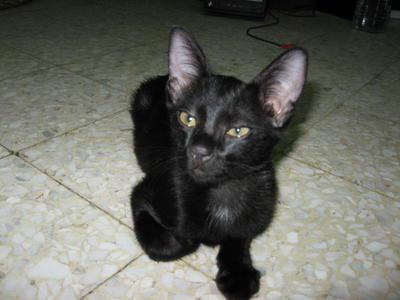

In [ ]:
example_image = example_row['Images']

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

In [ ]:
train_data = train_data.sample(500, random_state=0)

In [ ]:
from autogluon.tabular import FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_data)

print(feature_metadata)

('float', [])        :  1 | ['PhotoAmt']
('int', [])          : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])       :  4 | ['Name', 'RescuerID', 'PetID', 'Images']
('object', ['text']) :  1 | ['Description']


In [ ]:
feature_metadata = feature_metadata.add_special_types({image_col: ['image_path']})

print(feature_metadata)

('float', [])              :  1 | ['PhotoAmt']
('int', [])                : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])             :  3 | ['Name', 'RescuerID', 'PetID']
('object', ['image_path']) :  1 | ['Images']
('object', ['text'])       :  1 | ['Description']


In [ ]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

{'NN_TORCH': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'AG_AUTOMM': {},
 'VW': {}}

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label).fit(
    train_data=train_data,
    hyperparameters=hyperparameters,
    feature_metadata=feature_metadata,
    time_limit=900,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240916_011950"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.15 GB / 12.67 GB (72.2%)
Disk Space Avail:   61.07 GB / 107.72 GB (56.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fa

In [ ]:
leaderboard = predictor.leaderboard(test_data)